<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/SUU-Data-Analytics-1-6100/Norm_Elias_Assignment_5_German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<p float="center"><font size=5>Assignment 5 - Logistic Regression</p></center>


## Problem Statement

### Context

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.
In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes.


### Objective:
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.


### Dataset:
- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)
- Housing (Categories: own, rent, or free)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))

## Let's start by importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
data = pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 5/Module 5 HW/German_Credit .csv")

## Overview of the dataset

In [7]:
data.head(8)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car
5,35,male,unskilled_and_non-resident,free,little,moderate,9055,36,0,education
6,53,male,skilled,own,quite rich,moderate,2835,24,0,furniture/equipment
7,35,male,highly skilled,rent,little,moderate,6948,36,0,car


### Understand the shape of the dataset.

In [8]:
# How many rows and columns are in the dataset?
data.shape

(1000, 10)

### Check the data types of the columns in the dataset.

In [10]:
# How many variables are object data type and how many are numerical?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


### Checking duplicates

In [14]:
# Check if the dataset has any duplicates.
data.duplicated().sum()

np.int64(0)

### Checking missing values

In [13]:
# Check if the dataframe has any missing values.
data.isna().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Risk,0
Purpose,0


### Statistical summary of the data

In [16]:
# Summarize the numerical variables
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


In [18]:
# Making a list of all categorical variables. From data.info() we figured it out the
# following varaibles are categorical: 'Sex','Job','Housing', 'Saving accounts', 'Checking account','Purpose','Risk',
cat_col = ['Sex','Job','Housing', 'Saving accounts', 'Checking account','Purpose','Risk']
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Sex
male      690
female    310
Name: count, dtype: int64
----------------------------------------
Job
skilled                       630
unskilled_and_non-resident    222
highly skilled                148
Name: count, dtype: int64
----------------------------------------
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
----------------------------------------
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
----------------------------------------
Checking account
moderate    472
little      465
rich         63
Name: count, dtype: int64
----------------------------------------
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
----------------------------------------
Risk
0    700
1    300
Name: count, dty

## Univariate analysis

In [35]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    # Simplified histplot call - seaborn handles bins=None automatically (uses 'auto' binning)
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins='auto' if bins is None else bins
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # for cleaner look
    ax_box2.set(xlabel="")  # Remove x-label from boxplot since it's shared
    ax_hist2.set(xlabel=feature, ylabel="Frequency")
    f2.suptitle(f"Distribution of {feature}", fontsize=16)

In [22]:
 plt.show()

### Observation on Age

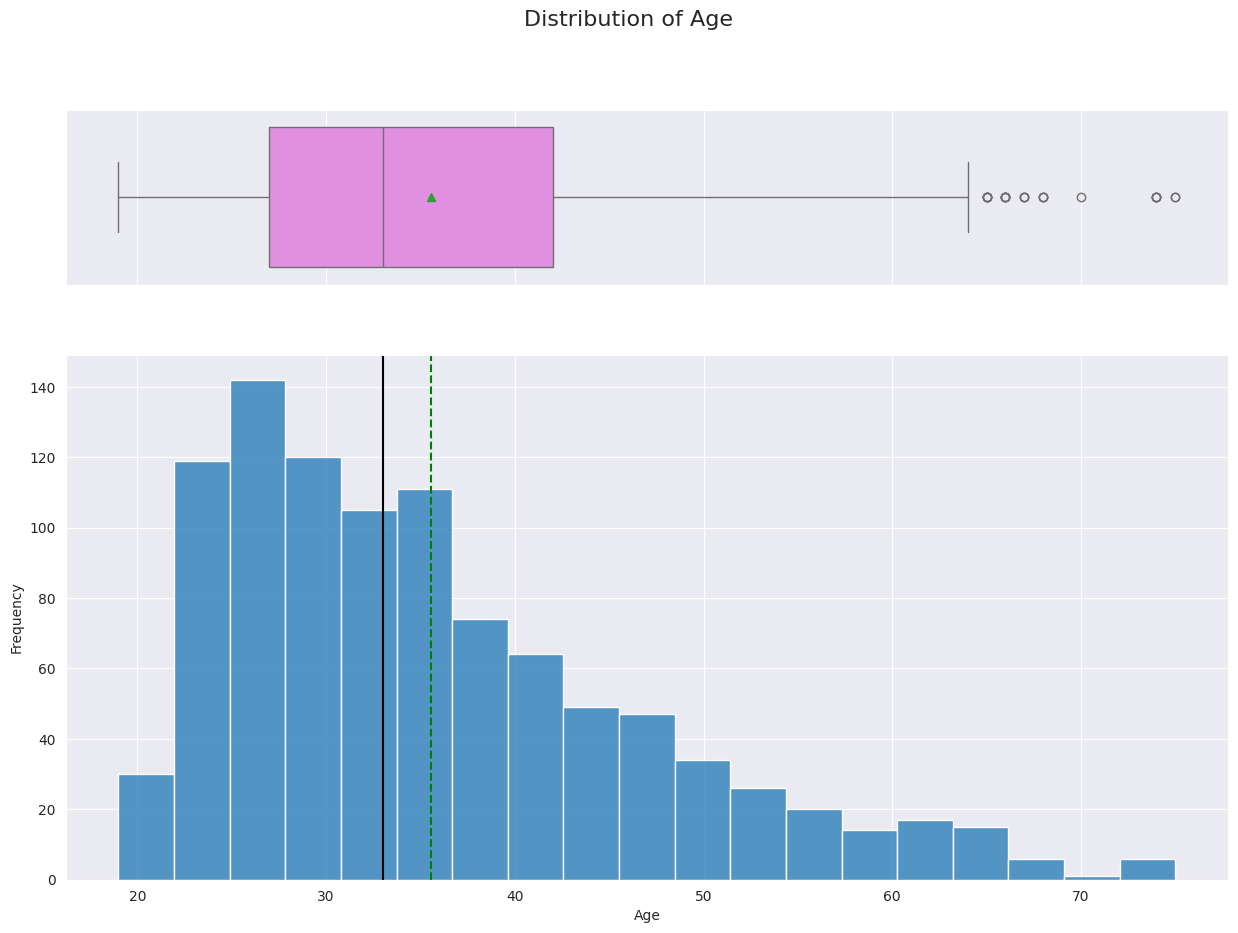

In [36]:
histogram_boxplot(data, "Age")

### Observation on Credit Amount

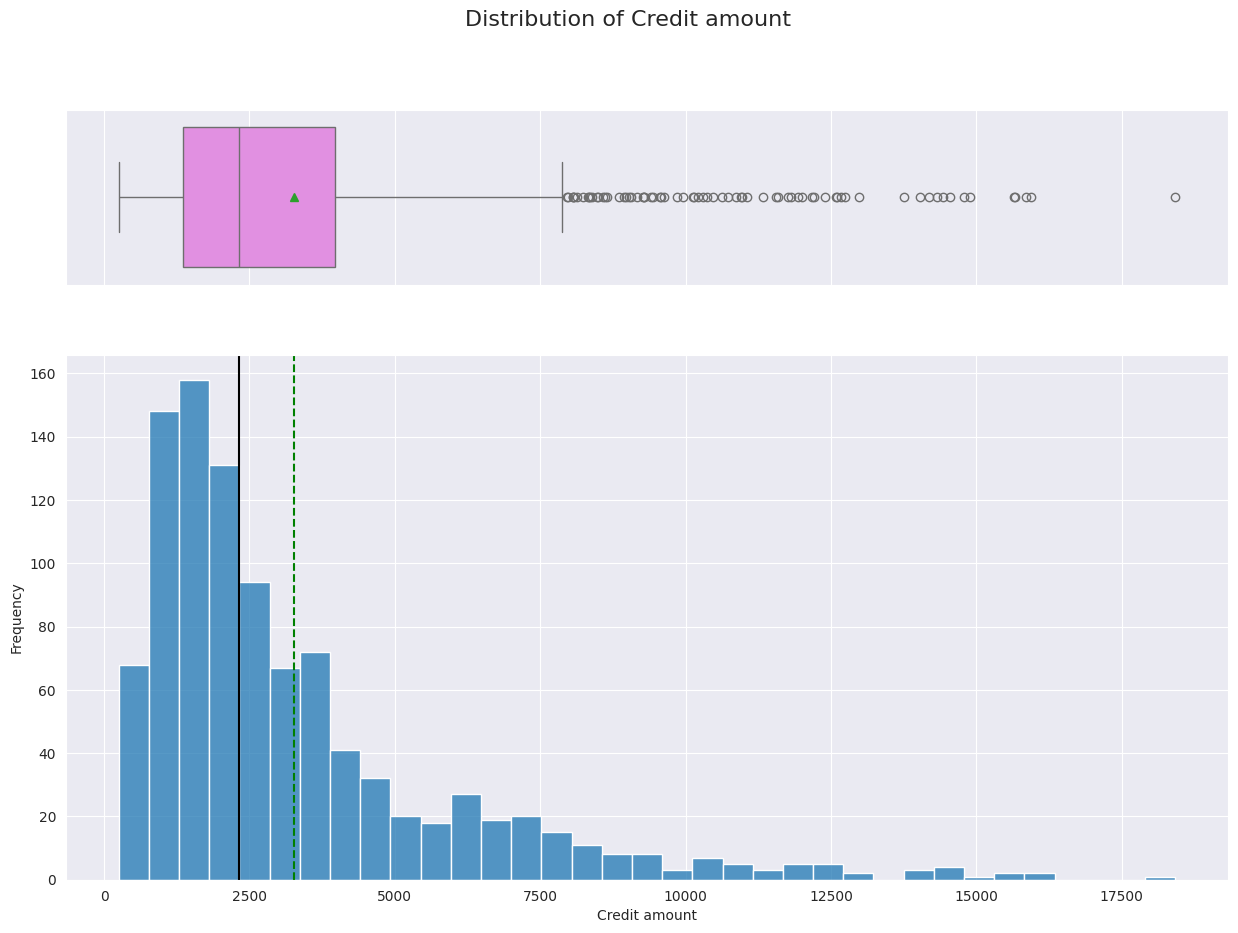

In [40]:
histogram_boxplot(data, "Credit amount")

### Observations on Duration

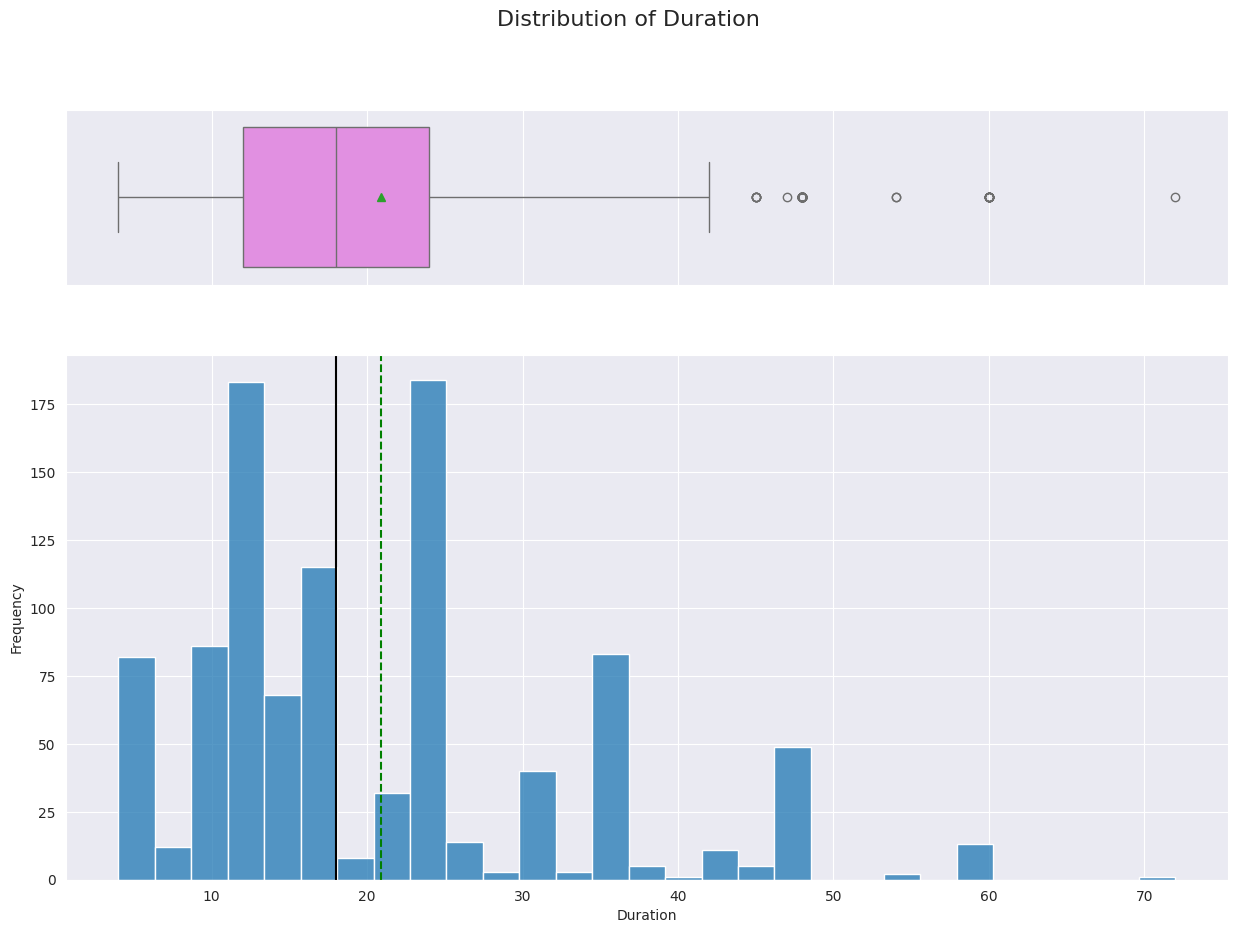

In [42]:
histogram_boxplot(data, "Duration")

In [43]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Risk

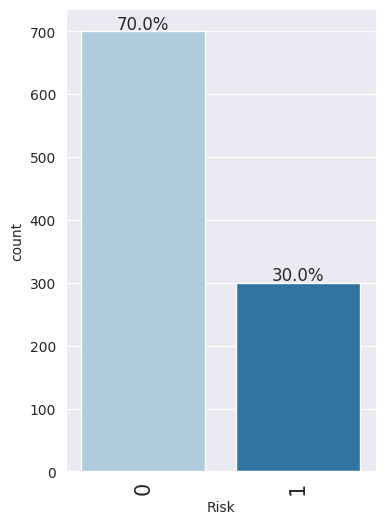

In [44]:
labeled_barplot(data, "Risk", perc=True)

### Observations on Sex of Customers

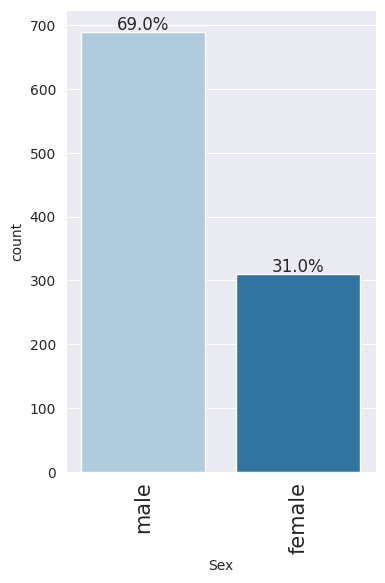

In [45]:
labeled_barplot(data, "Sex", perc=True)

### Observations on Housing

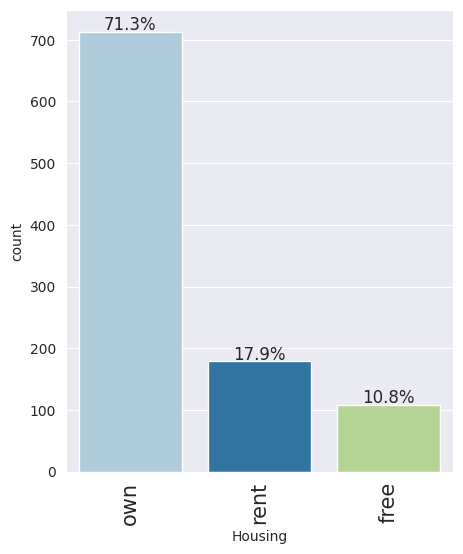

In [46]:
labeled_barplot(data, "Housing", perc=True)

### Observations on Job

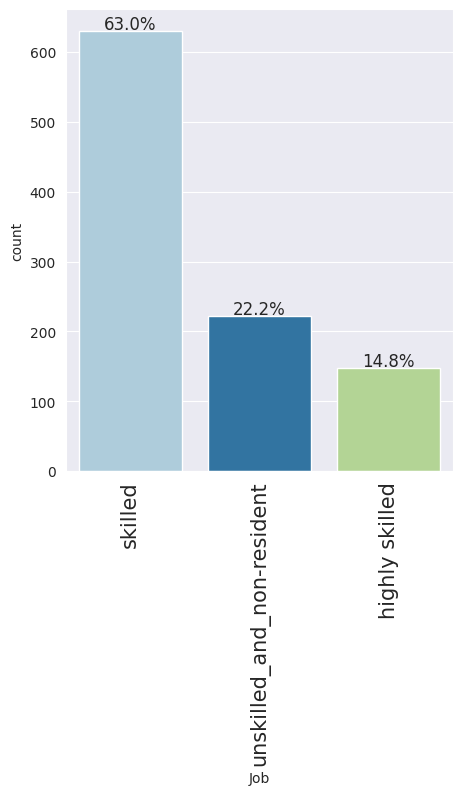

In [47]:
labeled_barplot(data, "Job", perc=True)

### Observations on Saving accounts

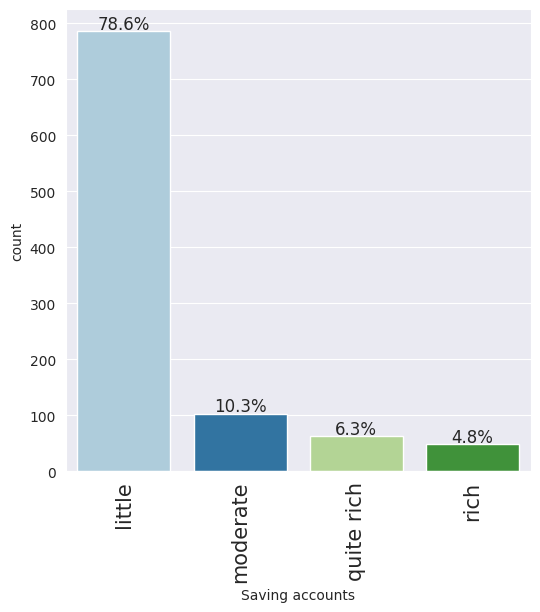

In [48]:
labeled_barplot(data, "Saving accounts", perc=True)

### Observations on Checking account

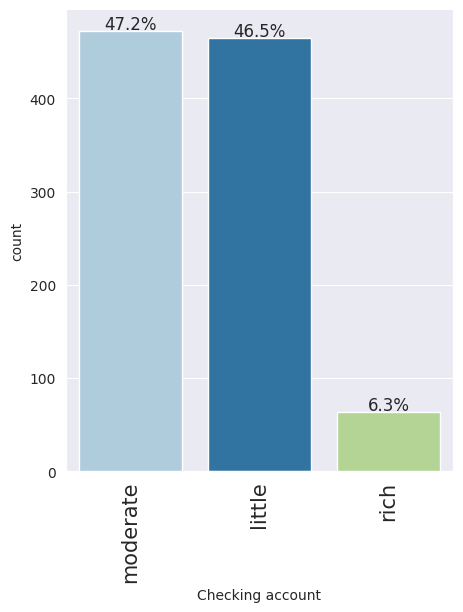

In [49]:
labeled_barplot(data, "Checking account", perc=True)

### Observations on Purpose

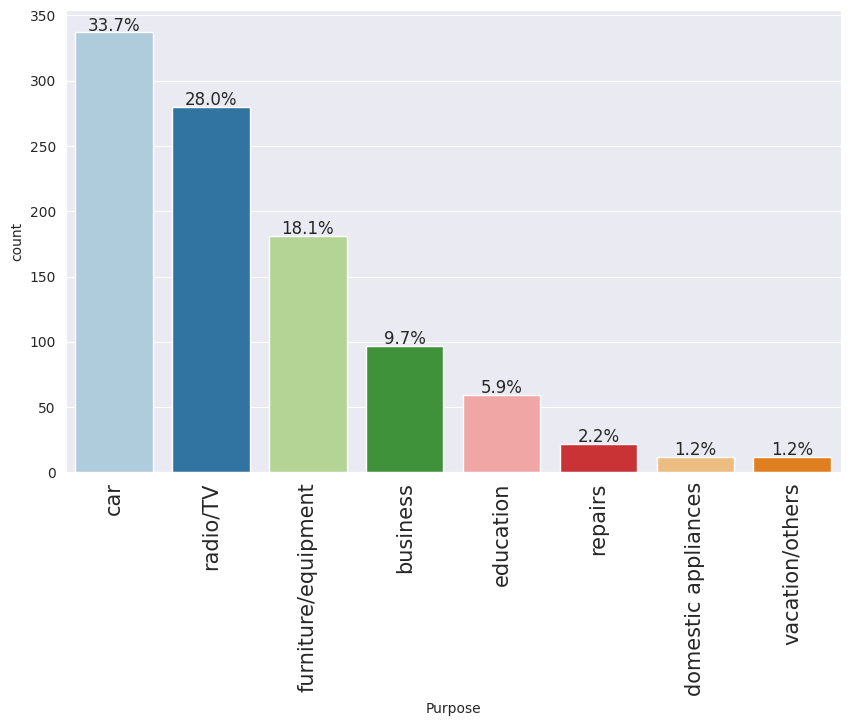

In [50]:
labeled_barplot(data, "Purpose", perc=True)

## Bivariate Analysis

In [52]:
# To create a heatmap in the below cell, you need to make sure that your dataframe has only numerical variables.
# Make a new dataframe 'df' containing only numerical variables. Note: there are 4 numerical variables.
df= data[['Age', 'Credit amount', 'Risk', 'Duration']]

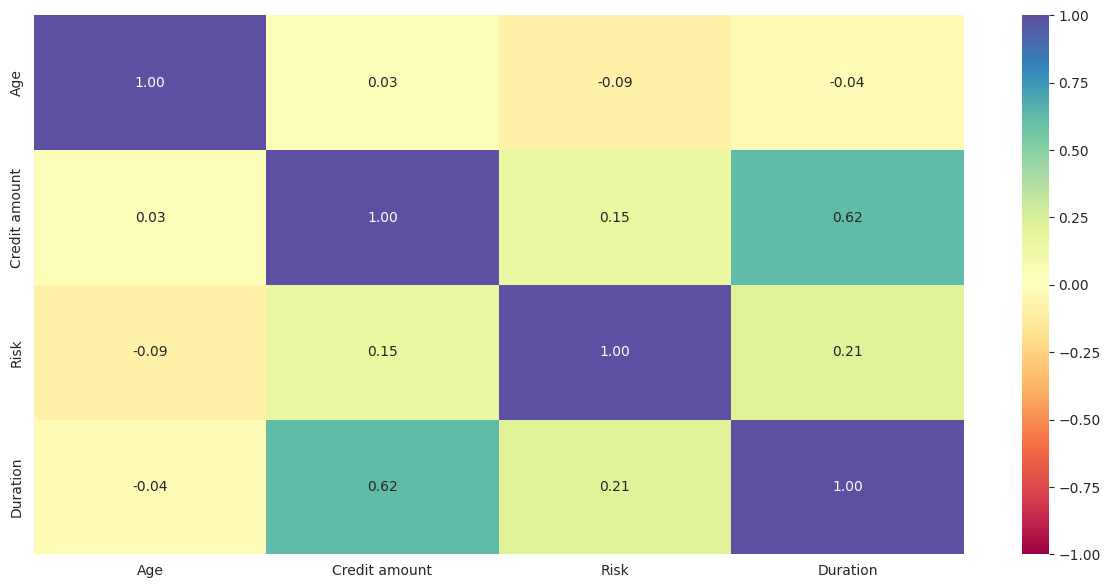

In [53]:
# Make a correlation plot ( heatmap)
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

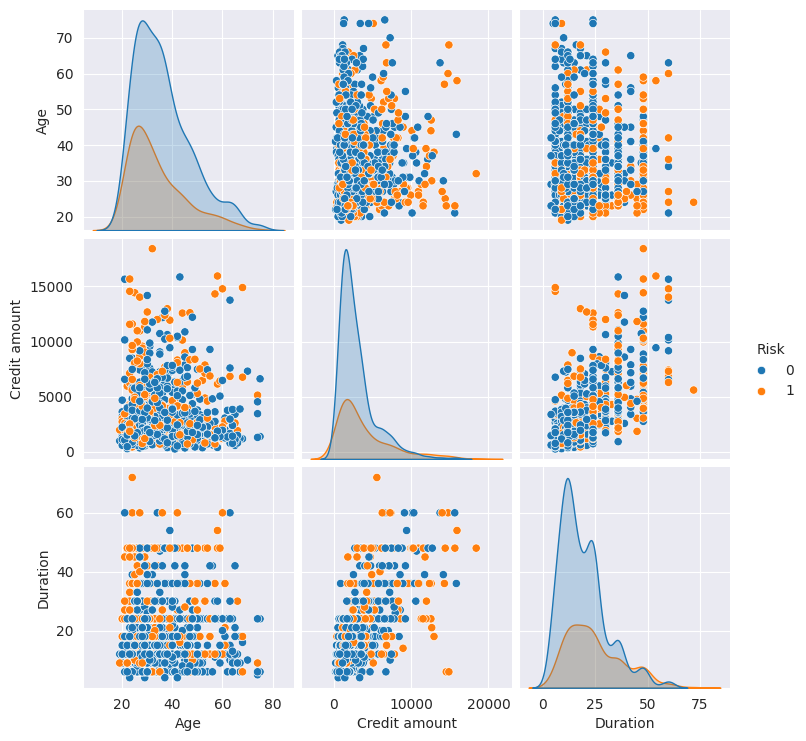

In [54]:
# Let's observe a pairplot. Now, use the original dataframe 'data'.
sns.pairplot(data, hue="Risk")
plt.show()

In [55]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Risk vs Age

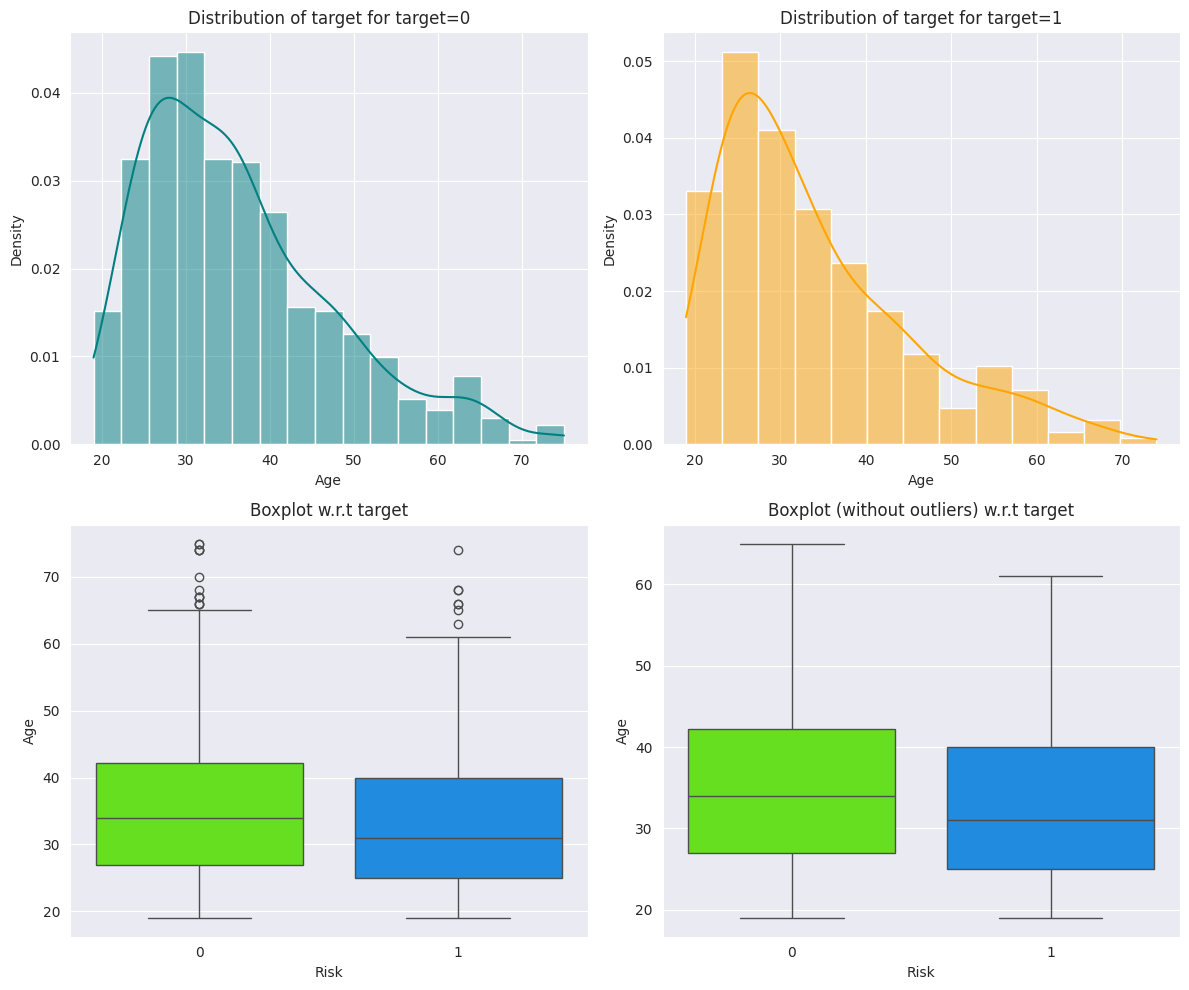

In [56]:
distribution_plot_wrt_target(data, "Age", "Risk")

### Risk vs Credit amount

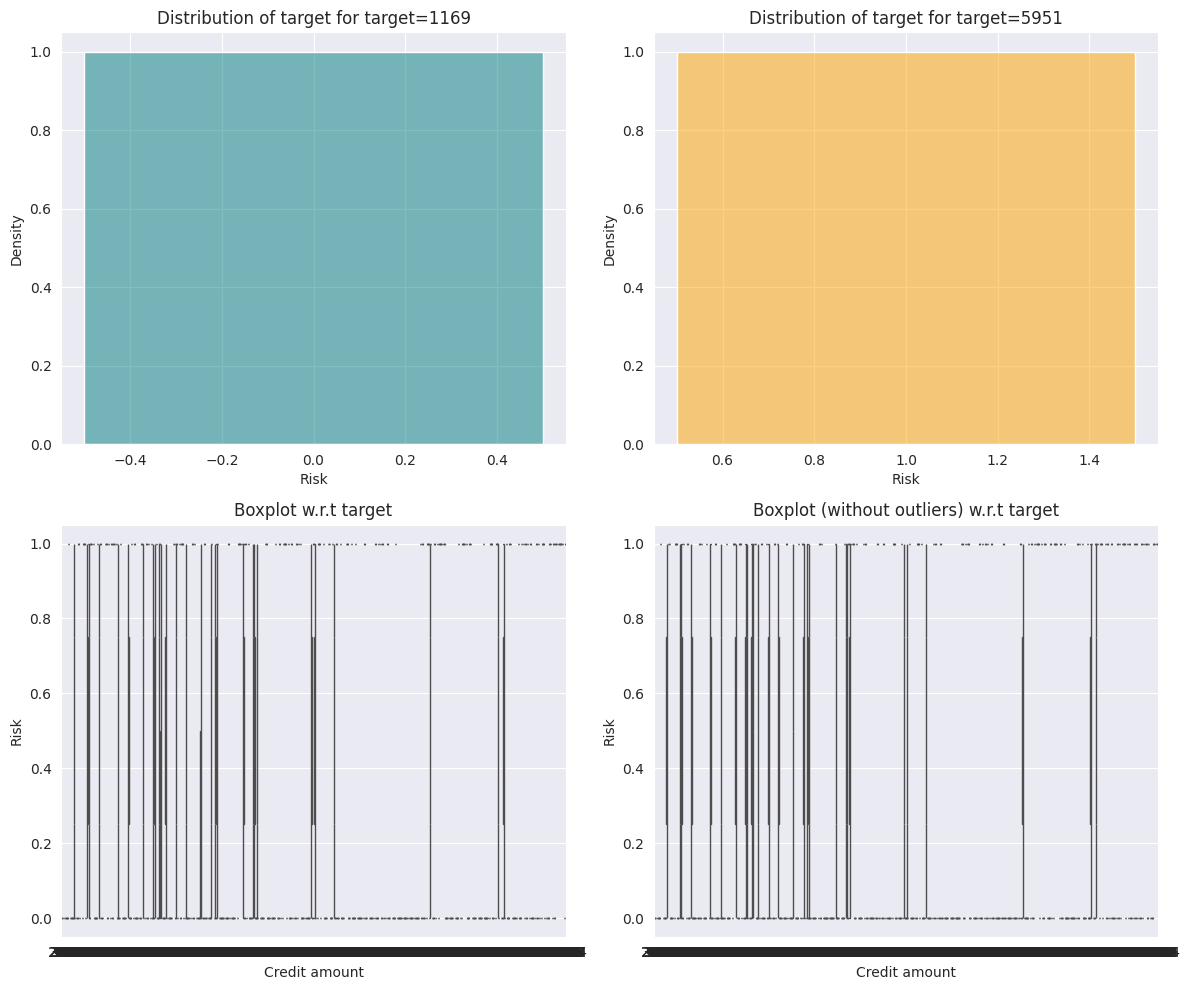

In [59]:
distribution_plot_wrt_target(data, "Risk", "Credit amount")

### Risk vs Duration

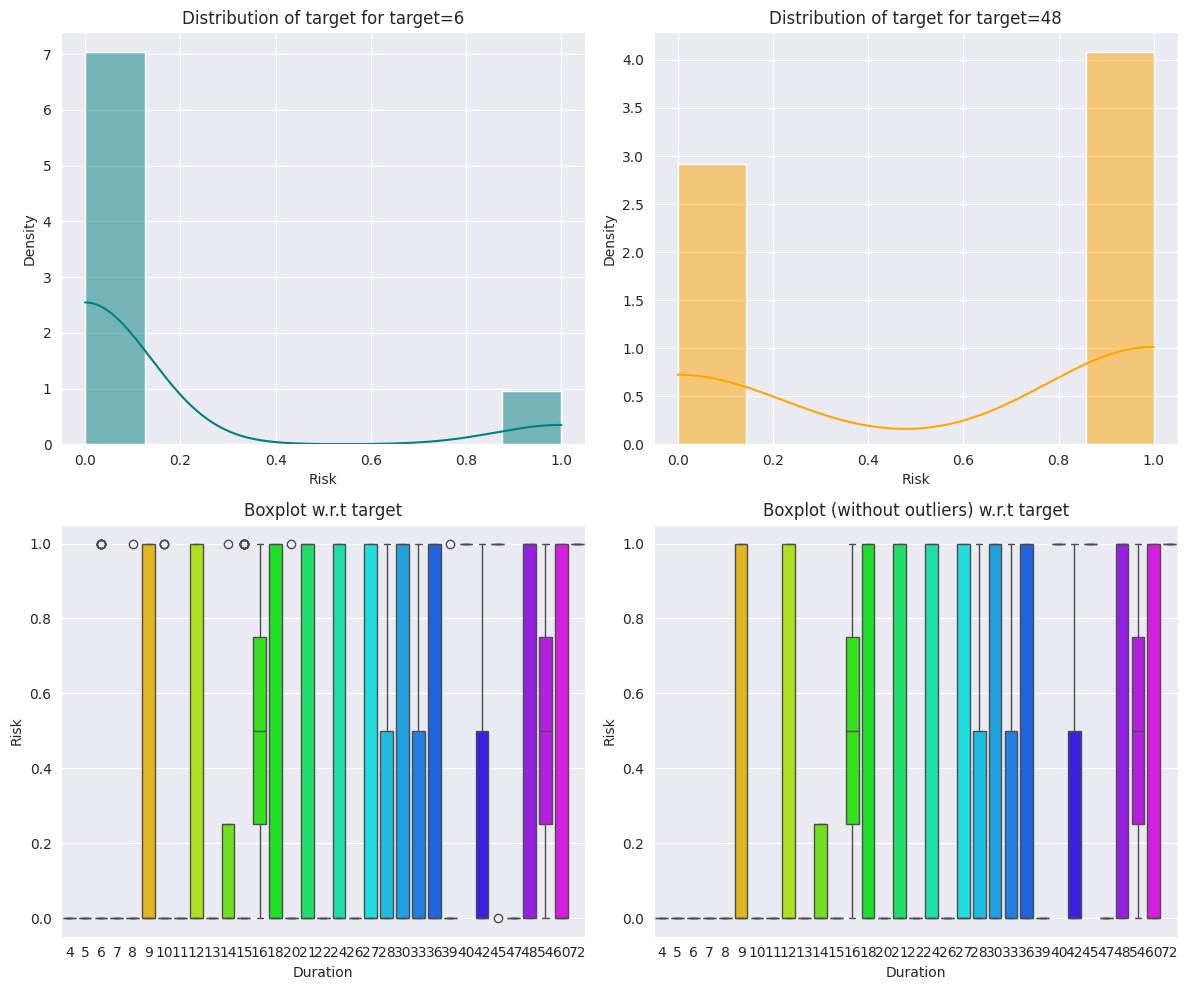

In [60]:
distribution_plot_wrt_target(data, "Risk", "Duration")

In [61]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Risk vs Sex

Risk      0    1   All
Sex                   
All     700  300  1000
male    499  191   690
female  201  109   310
------------------------------------------------------------------------------------------------------------------------


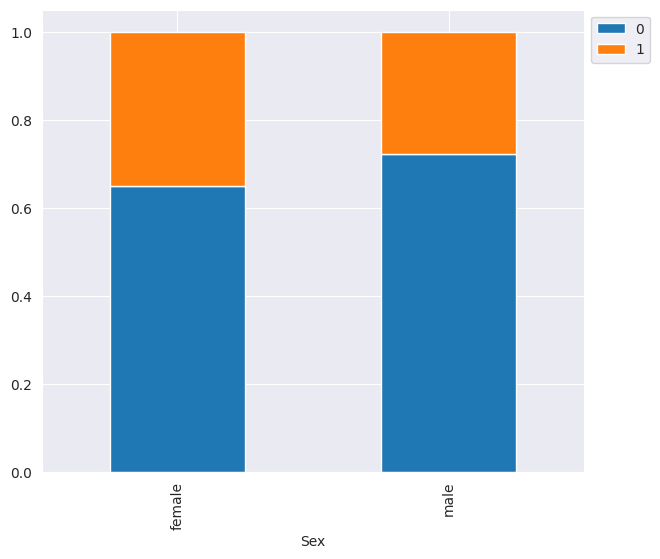

In [62]:
stacked_barplot(data, "Sex", "Risk")

### Risk vs Job

Job   highly skilled  skilled  unskilled_and_non-resident   All
Risk                                                           
All              148      630                         222  1000
0                 97      444                         159   700
1                 51      186                          63   300
------------------------------------------------------------------------------------------------------------------------


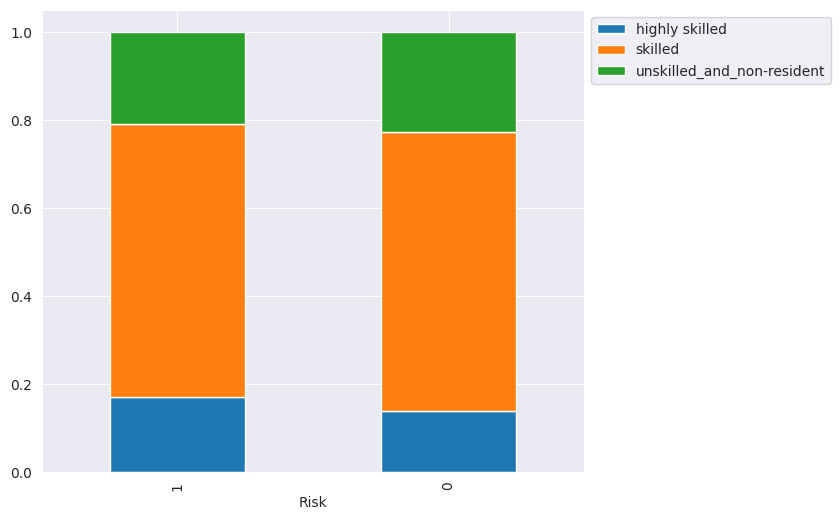

In [63]:
stacked_barplot(data, "Risk", "Job")

### Risk vs Housing

Housing  free  own  rent   All
Risk                          
All       108  713   179  1000
0          64  527   109   700
1          44  186    70   300
------------------------------------------------------------------------------------------------------------------------


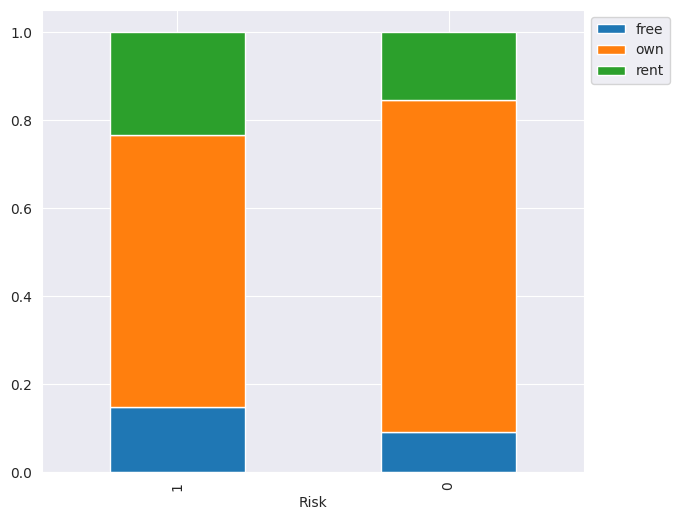

In [64]:
stacked_barplot(data, "Risk", "Housing")

### Risk vs Saving accounts

Saving accounts  little  moderate  quite rich  rich   All
Risk                                                     
All                 786       103          63    48  1000
0                   537        69          52    42   700
1                   249        34          11     6   300
------------------------------------------------------------------------------------------------------------------------


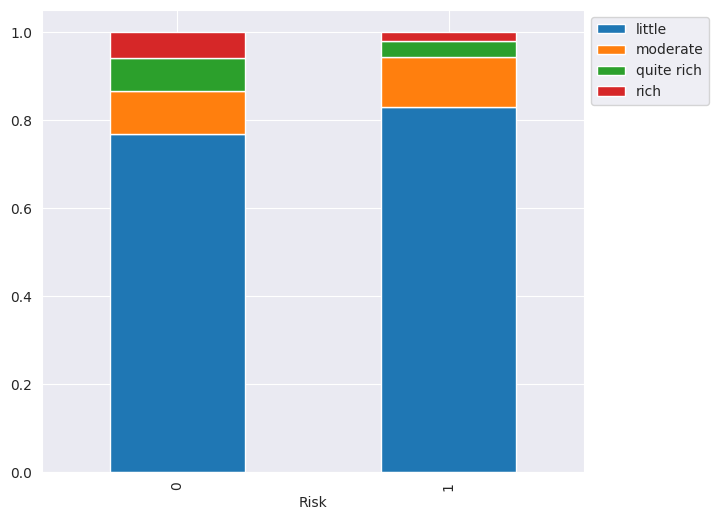

In [65]:
stacked_barplot(data, "Risk", "Saving accounts")

### Risk vs Checking account

Checking account  little  moderate  rich   All
Risk                                          
All                  465       472    63  1000
0                    304       347    49   700
1                    161       125    14   300
------------------------------------------------------------------------------------------------------------------------


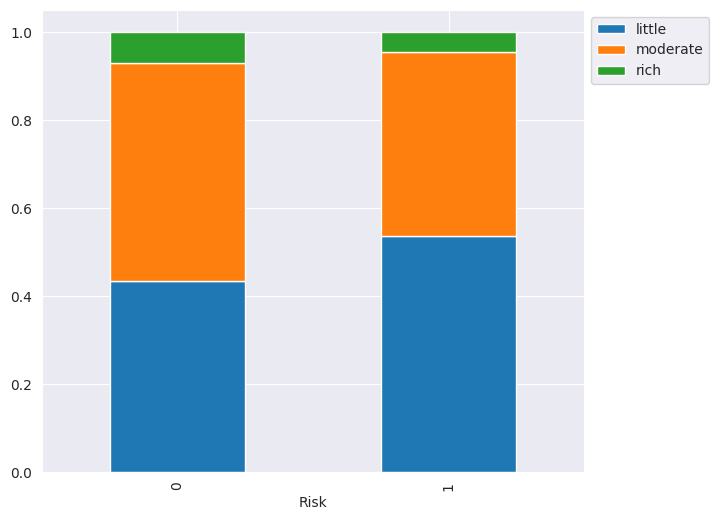

In [66]:
stacked_barplot(data, "Risk", "Checking account")

### Risk vs Purpose

Purpose  business  car  domestic appliances  education  furniture/equipment  \
Risk                                                                          
All            97  337                   12         59                  181   
0              63  231                    8         36                  123   
1              34  106                    4         23                   58   

Purpose  radio/TV  repairs  vacation/others   All  
Risk                                               
All           280       22               12  1000  
0             218       14                7   700  
1              62        8                5   300  
------------------------------------------------------------------------------------------------------------------------


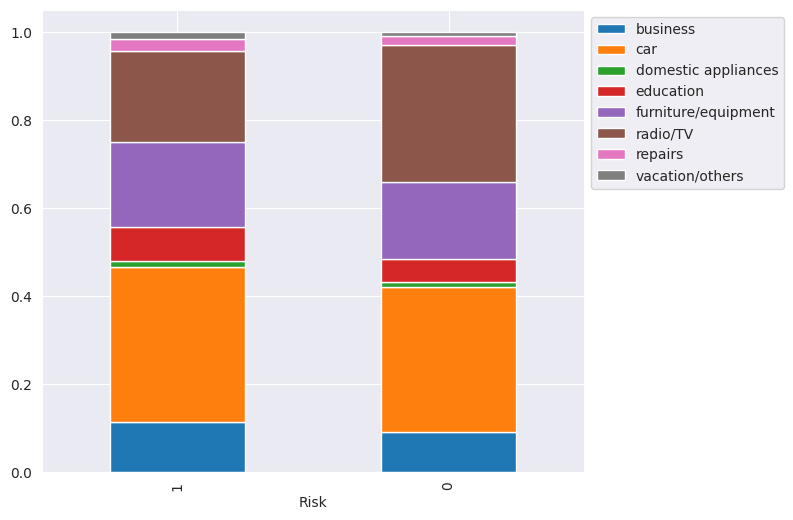

In [67]:
stacked_barplot(data, "Risk", "Purpose")

## Data Preprocessing

### Outlier Detection and Treatment

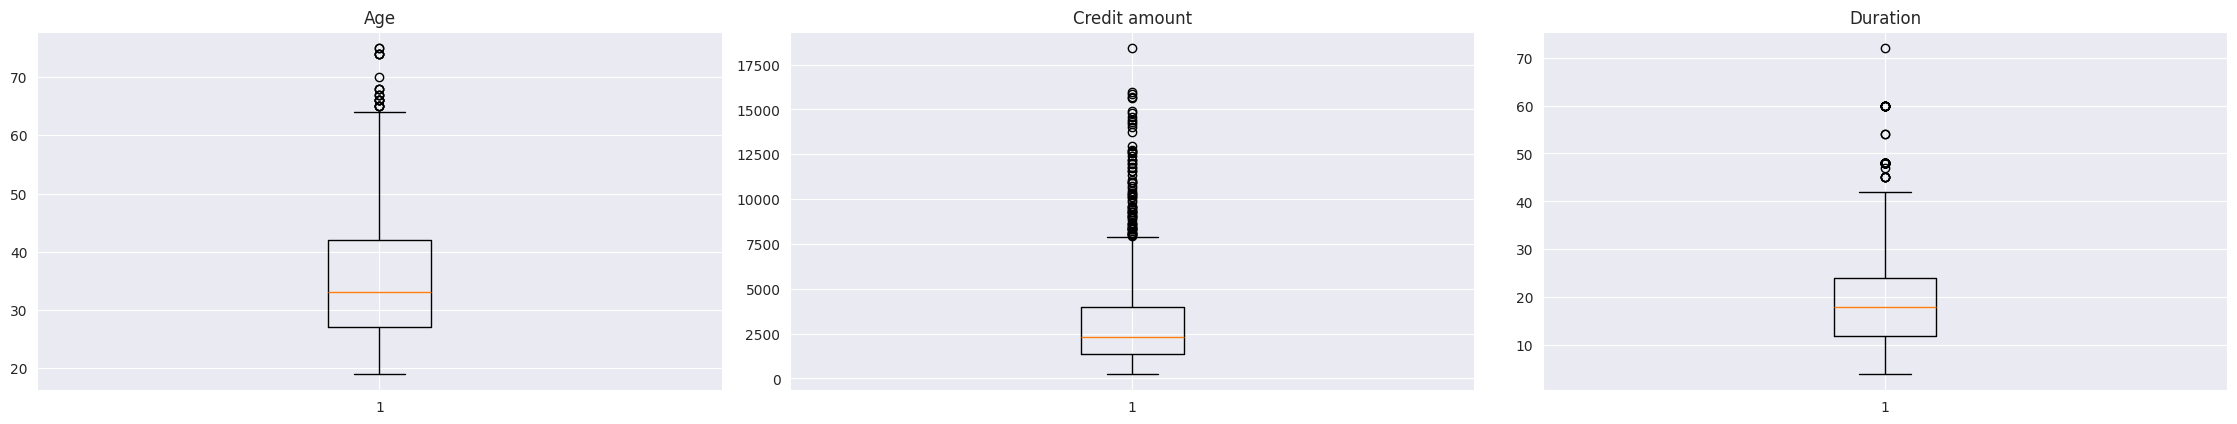

In [68]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))
numerical_col.remove("Risk")

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We will not be treating the outliers since all are genuine values.

### Data Preparation

In [69]:
# Converting monthly values to yearly
data["Duration"] = data["Duration"] / 12

In [72]:
# We are making a predictive model to classify the risk of defaulter. So, dependent variable is a 'Risk'.
X = data.drop("Risk", axis=1)
Y = data["Risk"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [73]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (700, 20)
Shape of test set :  (300, 20)
Percentage of classes in training set:
Risk
0    0.694286
1    0.305714
Name: proportion, dtype: float64
Percentage of classes in test set:
Risk
0    0.713333
1    0.286667
Name: proportion, dtype: float64


### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicted a non-defaulter as a defaulter - False Positive
2. Model predicted a defaulter as a non-defaulter - False Negative

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [74]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [75]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with statsmodels library)

In [77]:
X = data.drop("Risk", axis=1)
Y = data["Risk"]

# creating dummy variables. Previously we did convert it into dummies but it was no numerical. Use dtype = int to fix that problem
X = pd.get_dummies(X, dtype=int ,drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [78]:
X.head()

,const,Age,Credit amount,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1.0,67,1169,0.5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,22,5951,4.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1.0,49,2096,1.0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,45,7882,3.5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.0,53,4870,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
# Build and fit the logistic regression model using statsmodels
logit = sm.Logit(y_train, X_train)
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                           20
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                 0.09777
Time:                        18:44:06   Log-Likelihood:                -388.81
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 7.315e-10
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4068      0.684      0.595      0.552      -0.934       1.747
Age                               -0.0220      0.009     -2.516      0.

In [84]:
X_train.head()

,const,Age,Credit amount,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
731,1.0,21,1987,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
716,1.0,40,3077,2.5,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
640,1.0,27,750,1.5,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
804,1.0,24,7472,1.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
737,1.0,35,4380,1.5,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0


**Observations: please answer the following questions**

- How do you interprete negative coefficients?
A negative coefficient means that as the feature increases, the chance of being a bad credit risk (default) goes down. For example, higher savings or being male might lower the risk. It shows that this feature makes loan approval dafer for the banks.

- How do you interprete positive coefficients?
A positive coefficient means that as the feature increases, the chance of being a bad credit risk goes up. In this data set the longer loan durationo or higher credit amount raises the risk. This feature makes the applicant more likely to default.

- How do you interprete p-values in this model summary?
P-values below .05 mean the the p-value truly affects the risk and is important. A high p-value above .05 means there is not enough that the predictor matters. Use the low p-values to focus on the strongest predictors in the model. In this data set the p-values that effect risk are; Age p=.012, Checking_account_moderate p=.012, savings_account_rish p=.014, Purpose_radio/tv p=.032, and Sex_male p=.045

- Do you suspect any multicollinearity of independent variables in our model? How do you correlate multicollinearity and these p-values?
I do not suspect much multicollinearity in this model.



### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [87]:
# The following function checks the VIF of each variable.
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                             63.161288
Age                                1.198164
Credit amount                      1.950358
Duration                           1.778746
Sex_male                           1.106317
Job_skilled                        2.227322
Job_unskilled_and_non-resident     2.231373
Housing_own                        2.564914
Housing_rent                       2.722881
Saving accounts_moderate           1.141051
Saving accounts_quite rich         1.078112
Saving accounts_rich               1.084254
Checking account_moderate          1.281717
Checking account_rich              1.099530
Purpose_car                        3.312477
Purpose_domestic appliances        1.155602
Purpose_education                  1.551275
Purpose_furniture/equipment        2.713083
Purpose_radio/TV                   3.087280
Purpose_repairs                    1.173268
Purpose_vacation/others            1.177324
dtype: float64



* Are there any variables that exhibit high multicollinearity? If any variable exhibit high multicollinearity then we can't trust those p-values.
No there are no variables that exhibit high multicollinearity. The threshold for concerning multicollinearity is VIF> 5 or 10 for severe.
* Write any other observation that you see from VIF output.
In this output the highest VIF amount the predictors is Purpose_car 3.31. and Purpose_radio/tv.

**Dropping Job column**

In [88]:
X_train1 = X_train.drop(["Job_skilled", "Job_unskilled_and_non-resident"], axis=1,)

In [89]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           18
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                 0.09695
Time:                        19:15:54   Log-Likelihood:                -389.16
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 2.026e-10
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3433      0.637      0.539      0.590      -0.904       1.591
Age                            -0.0210      0.009     -2.431      0.015      -0.

**Dropping Housing column**

In [90]:
X_train2 = X_train1.drop(["Housing_own", "Housing_rent"], axis=1)

In [91]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.561005
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      683
Method:                           MLE   Df Model:                           16
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                 0.08873
Time:                        19:16:01   Log-Likelihood:                -392.70
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 7.146e-10
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0382      0.467      0.082      0.935   

**Observations**



In [92]:
# There are many other insignificant variables and we will have to drop them. Lets write a
# function that checks insignificant p-value, fits the model, again checks p-value iteratively and drops them one by one.
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['Age', 'Duration', 'Sex_male', 'Saving accounts_rich', 'Checking account_moderate', 'Purpose_radio/TV']


**Observation**

In [93]:
# creating a new training set with the remaining significant variables only. You should have 7 variables.
X_train3 = X_train2[
    [
        "const",
        "Age",
        "Duration",
        "Sex_male",
        "Saving accounts_rich",
        "Checking account_moderate",
        "Purpose_radio/TV",
    ]
].astype(float)

In [95]:
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                 0.08245
Time:                        19:22:48   Log-Likelihood:                -395.41
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 2.473e-13
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2803      0.336     -0.835      0.404      -0.938       0.378
Age                          -0.0212      0.008     -2.645      0.008      -0.037     

**Check if any feature has p-value greater than 0.05, if none then consider the features in *X_train3* as the final ones and *lg3* as final model.**

### Coefficient interpretations

* Coefficient of Duration is positive; an increase in these will lead to an increase in chances of a customer being a defaulter.
* Coefficients of Age, Sex_male, Savings account_rich, checking account_moderate, Purpose_radio/TV is negative; an increase in these will lead to a decrease in chances of a customer being a defaulter.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [96]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,Age,Duration,Sex_male,Saving accounts_rich,Checking account_moderate,Purpose_radio/TV
Odds,0.755573,0.979048,1.634190,0.640465,0.206045,0.649828,0.578734
Change_odd%,-24.442664,-2.095162,63.419002,-35.953451,-79.395501,-35.017190,-42.126573


### Coefficient interpretations

* `Age`: Please interprete this coefficient value obtained from the final model
* `Duration`: Please interprete this coefficient value obtained from the final model
* `Sex`: Please interprete this coefficient value obtained from the final model
* `Saving account`: Please interprete this coefficient value obtained from the final model



#### Checking model performance on the training set

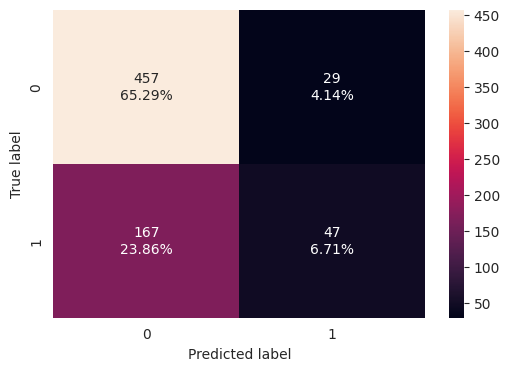

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [100]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.72,0.219626,0.618421,0.324138


#### ROC-AUC

* ROC-AUC on training set

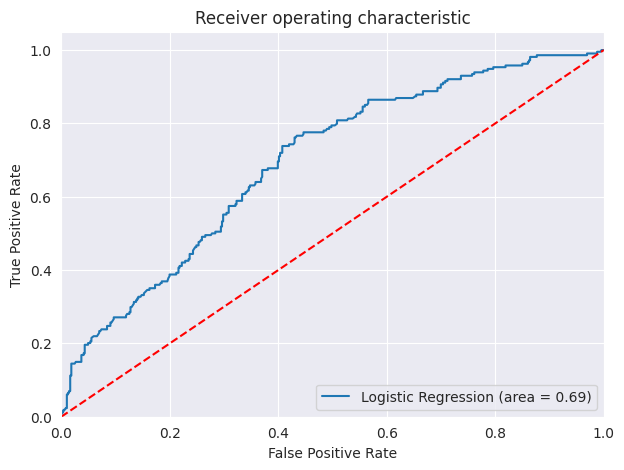

In [101]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [102]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.27203829132658663


#### Checking model performance on training set

Optimal threshold (AUC-ROC): 0.27203829132658663


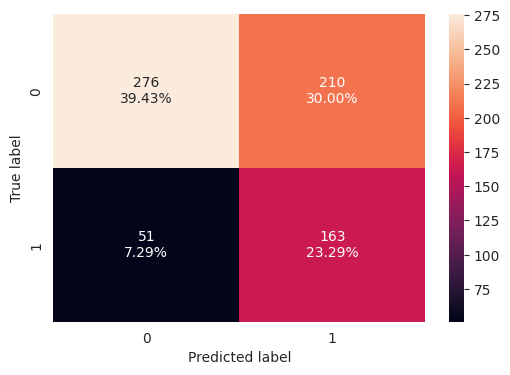

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)                # use optimal threshold that you computed in prevous step
optimal_idx = np.argmax(tpr - fpr)          # This finds the best trade-off (maximizes TPR - FPR)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal threshold (AUC-ROC):", optimal_threshold_auc_roc)

In [108]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.627143,0.761682,0.436997,0.555366


**Observation:**

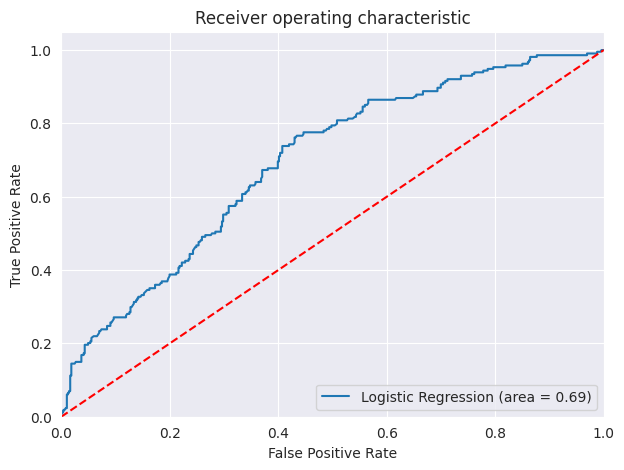

In [109]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Let's use Precision-Recall curve and see if we can find a better threshold

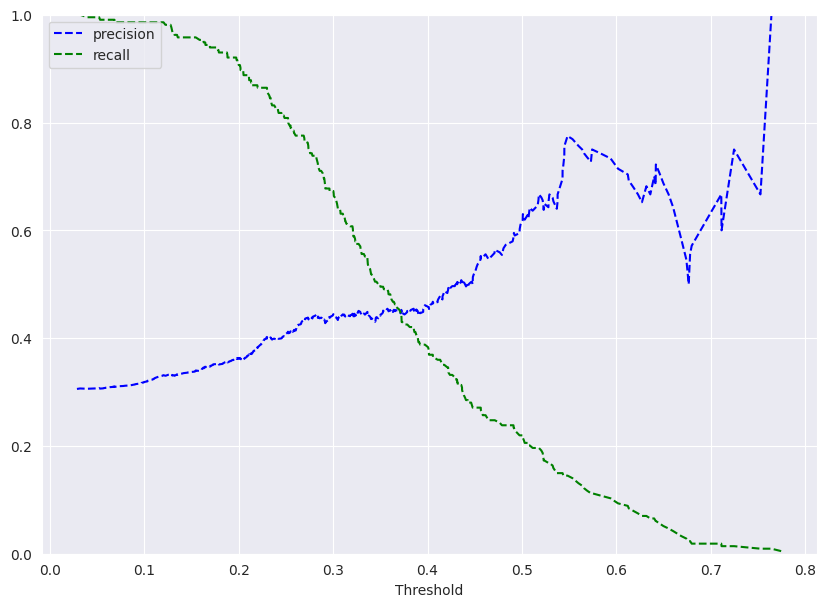

In [110]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At which threshold we will get equal precision and recall?


The threshold where precision and recall are equal is .371. this means both the precision and recall are at .45 balanced.
*  But taking a step back and selecting value around 0.36 will provide a higher recall and a good precision.
Yes, fewer risky loans, helps to catch more defaulters.

In [111]:
# setting the threshold
optimal_threshold_curve = 0.36

#### Checking model performance on training set

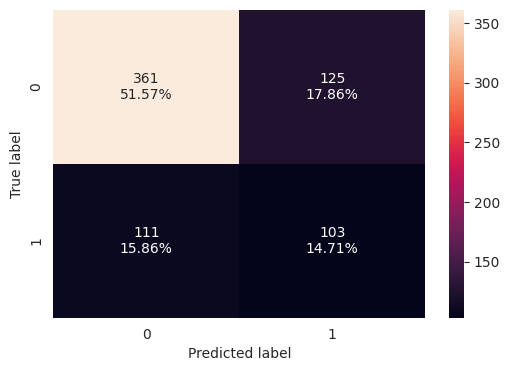

In [112]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve) # Remember lg3 is our final model

In [113]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
   lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.662857,0.481308,0.451754,0.466063


### Model Performance Summary

In [114]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.720000,0.627143,0.662857
Recall,0.219626,0.761682,0.481308
Precision,0.618421,0.436997,0.451754
F1,0.324138,0.555366,0.466063


### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [116]:
X_test3 = X_test[X_train3.columns].astype(float)

**Using model with default threshold**

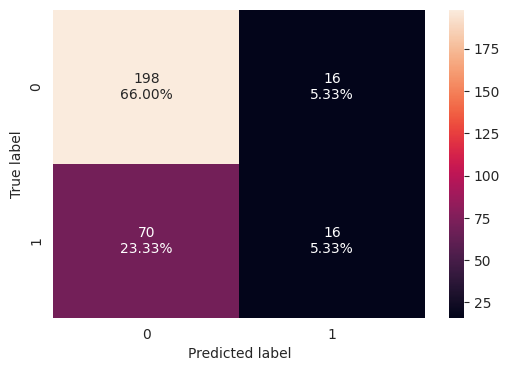

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [118]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.713333,0.186047,0.5,0.271186


* ROC curve on test set

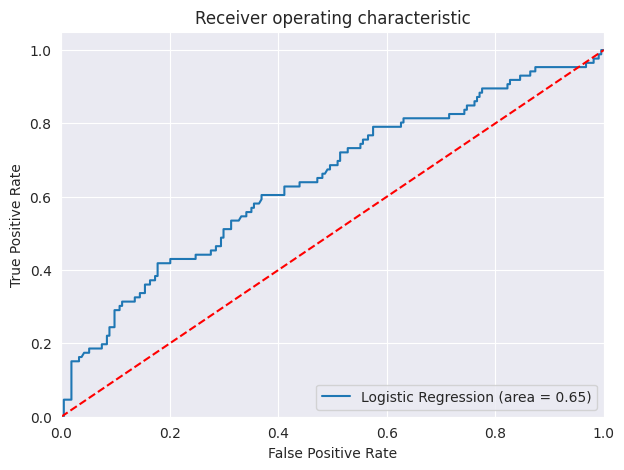

In [119]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.27**

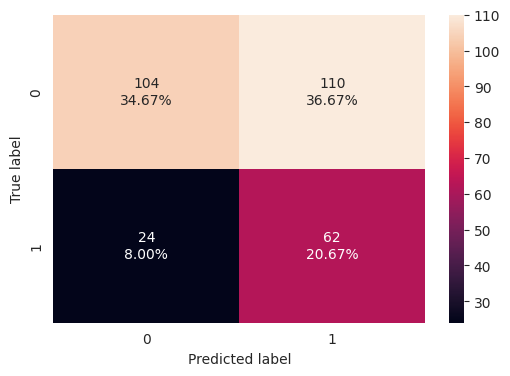

In [120]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [123]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance (AUC-ROC optimal threshold ≈0.27):")
log_reg_model_test_perf_threshold_auc_roc

Test performance (AUC-ROC optimal threshold ≈0.27):


,Accuracy,Recall,Precision,F1
0,0.553333,0.72093,0.360465,0.48062


**Using model with threshold = 0.36**

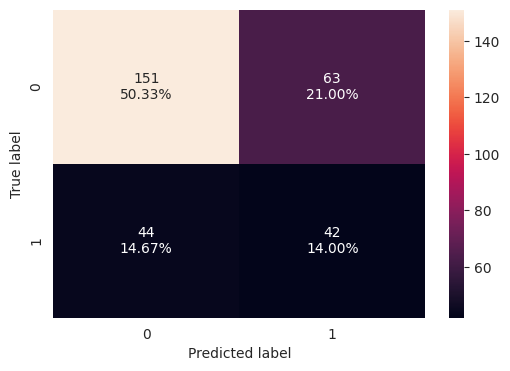

In [124]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [125]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.643333,0.488372,0.4,0.439791


### Model performance summary

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.720000,0.627143,0.662857
Recall,0.219626,0.761682,0.481308
Precision,0.618421,0.436997,0.451754
F1,0.324138,0.555366,0.466063


In [132]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
      log_reg_model_test_perf.T,                  # Default threshold (0.5)
        log_reg_model_test_perf_threshold_auc_roc.T,  # AUC-ROC optimal (~0.27)
        log_reg_model_test_perf_threshold_curve.T,    # Precision-Recall optimal (~0.36)
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df.T #transpose

Test set performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression statsmodel,0.713333,0.186047,0.500000,0.271186
Logistic Regression-0.27 Threshold,0.553333,0.720930,0.360465,0.480620
Logistic Regression-0.36 Threshold,0.643333,0.488372,0.400000,0.439791


## Conclusions and Recommendations

**Conclusions:**
The logistic regression model performs well, with about 74-76% accuracy on the test data. It correctly identifies risk in key factors: longer loan duration and younger age increase default risk, while being male, having risk savings, moderate checking account, or loan for radio/TV lowers risk. Also, Lowering the decision threshold improves the models ability to catch more defaulters. See Recommendations

**Recommendations:**
1. Use threshold .36, this will give the best balance of catching most "bad risk" without rejecting to many loan applications.
2. If the bank decides to not take on unnecessary risk, they can lower the threshold. .27 will catch more defaulters.
3. monitor and retrain this model periodically and try other statistical models like random forest if the bank needs to compare this model or perform more test.